In [1]:
import math
import collections

import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 16
uscovid = pd.read_csv('us-counties.csv', dtype={'state': str,'fips': float, 'cases': float})
uscovid.fillna(0)
uscovid = uscovid.drop(["fips", "deaths"], axis=1)
uscovid = uscovid.groupby(['date'],as_index=False).agg({'cases': 'sum'})

In [3]:
ar1 = uscovid.set_index(['date']).shift(1)
uscovid = uscovid.set_index('date')
ar = pd.concat([uscovid, ar1],axis=1)

ar2 = uscovid.set_index(uscovid.index).shift(2)
ar = pd.concat([ar, ar2],axis=1)

for i in range (3, 14):
    ar1 = uscovid.set_index(uscovid.index).shift(i)
    ar = pd.concat([ar, ar1],axis=1)
    

cols = ['y']

for i in range(1, 14):
    j = str(i)
    cols.append('y-' + j)
    
ar.columns = cols


print(ar)

                     y         y-1         y-2         y-3         y-4  \
date                                                                     
2020-01-21         1.0         NaN         NaN         NaN         NaN   
2020-01-22         1.0         1.0         NaN         NaN         NaN   
2020-01-23         1.0         1.0         1.0         NaN         NaN   
2020-01-24         2.0         1.0         1.0         1.0         NaN   
2020-01-25         3.0         2.0         1.0         1.0         1.0   
...                ...         ...         ...         ...         ...   
2021-03-02  28737407.0  28679618.0  28622946.0  28572021.0  28509327.0   
2021-03-03  28804121.0  28737407.0  28679618.0  28622946.0  28572021.0   
2021-03-04  28871536.0  28804121.0  28737407.0  28679618.0  28622946.0   
2021-03-05  28937218.0  28871536.0  28804121.0  28737407.0  28679618.0   
2021-03-06  28993824.0  28937218.0  28871536.0  28804121.0  28737407.0   

                   y-5         y-6   

In [4]:
ar['ma2'] = ar[['y-1', 'y-2']].mean(axis=1)
ar['ma2']

date
2020-01-21           NaN
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           1.0
2020-01-25           1.5
                 ...    
2021-03-02    28651282.0
2021-03-03    28708512.5
2021-03-04    28770764.0
2021-03-05    28837828.5
2021-03-06    28904377.0
Name: ma2, Length: 411, dtype: float64

In [5]:
ar['ma5'] = ar[['y-1', 'y-2', 'y-3', 'y-4', 'y-5']].mean(axis=1)
ar['ma5']

date
2020-01-21            NaN
2020-01-22           1.00
2020-01-23           1.00
2020-01-24           1.00
2020-01-25           1.25
                 ...     
2021-03-02    28562995.40
2021-03-03    28624263.80
2021-03-04    28683222.60
2021-03-05    28743125.60
2021-03-06    28805980.00
Name: ma5, Length: 411, dtype: float64

In [6]:
print(ar)

                     y         y-1         y-2         y-3         y-4  \
date                                                                     
2020-01-21         1.0         NaN         NaN         NaN         NaN   
2020-01-22         1.0         1.0         NaN         NaN         NaN   
2020-01-23         1.0         1.0         1.0         NaN         NaN   
2020-01-24         2.0         1.0         1.0         1.0         NaN   
2020-01-25         3.0         2.0         1.0         1.0         1.0   
...                ...         ...         ...         ...         ...   
2021-03-02  28737407.0  28679618.0  28622946.0  28572021.0  28509327.0   
2021-03-03  28804121.0  28737407.0  28679618.0  28622946.0  28572021.0   
2021-03-04  28871536.0  28804121.0  28737407.0  28679618.0  28622946.0   
2021-03-05  28937218.0  28871536.0  28804121.0  28737407.0  28679618.0   
2021-03-06  28993824.0  28937218.0  28871536.0  28804121.0  28737407.0   

                   y-5         y-6   

In [7]:
ar = ar.fillna(0)
ar

,y,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,y-11,y-12,y-13,ma2,ma5
date,,,,,,,,,,,,,,,,
2020-01-21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-23,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-24,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-25,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,27873040.0,28651282.0,28562995.40
2021-03-03,28804121.0,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,28708512.5,28624263.80
2021-03-04,28871536.0,28804121.0,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,28770764.0,28683222.60


In [8]:
X = ar.drop('y', axis=1)
y = ar['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(328, 15)
(83, 15)
(328,)
(83,)


In [9]:
X_train

,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,y-11,y-12,y-13,ma2,ma5
date,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-23,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-24,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00
2020-01-25,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,14001210.0,13799999.0,13615739.0,13447900.0,13311528.0,13160382.0,12954496.0,15142373.5,14843856.20
2020-12-10,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,14001210.0,13799999.0,13615739.0,13447900.0,13311528.0,13160382.0,15362182.0,15048194.20
2020-12-11,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,14001210.0,13799999.0,13615739.0,13447900.0,13311528.0,15584909.0,15256541.20


In [10]:
X_test

,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,y-11,y-12,y-13,ma2,ma5
date,,,,,,,,,,,,,,,
2020-12-14,16369491.0,16185267.0,15977838.0,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,14001210.0,13799999.0,16277379.0,15940482.8
2020-12-15,16570615.0,16369491.0,16185267.0,15977838.0,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,14001210.0,16470053.0,16160195.8
2020-12-16,16773586.0,16570615.0,16369491.0,16185267.0,15977838.0,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,14218973.0,16672100.5,16375359.4
2020-12-17,17018628.0,16773586.0,16570615.0,16369491.0,16185267.0,15977838.0,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,14450360.0,16896107.0,16583517.4
2020-12-18,17257055.0,17018628.0,16773586.0,16570615.0,16369491.0,16185267.0,15977838.0,15697768.0,15472050.0,15252314.0,15032433.0,14828141.0,14656033.0,17137841.5,16797875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,27873040.0,28651282.0,28562995.4
2021-03-03,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,27944914.0,28708512.5,28624263.8
2021-03-04,28804121.0,28737407.0,28679618.0,28622946.0,28572021.0,28509327.0,28431065.0,28353261.0,28279131.0,28207329.0,28147867.0,28092672.0,28022949.0,28770764.0,28683222.6


In [11]:
y_train

date
2020-01-21           1.0
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           3.0
                 ...    
2020-12-09    15472050.0
2020-12-10    15697768.0
2020-12-11    15977838.0
2020-12-12    16185267.0
2020-12-13    16369491.0
Name: y, Length: 328, dtype: float64

In [12]:
y_test

date
2020-12-14    16570615.0
2020-12-15    16773586.0
2020-12-16    17018628.0
2020-12-17    17257055.0
2020-12-18    17508278.0
                 ...    
2021-03-02    28737407.0
2021-03-03    28804121.0
2021-03-04    28871536.0
2021-03-05    28937218.0
2021-03-06    28993824.0
Name: y, Length: 83, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor 

scaler = StandardScaler() 
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)  
X_test_trans = scaler.transform(X_test)

#model tunned by Professor Hall 
model = MLPRegressor(solver='lbfgs', alpha=1e-5, max_iter=3000,
                     hidden_layer_sizes=(5, 2), random_state=12345)

model.fit(X_train_trans, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=3000,
             random_state=12345, solver='lbfgs')

In [14]:
print(X_train_trans)

[[-1.00904563 -1.00845051 -1.00781669 ... -0.996627   -1.00875371
  -1.00774874]
 [-1.00904539 -1.00845051 -1.00781669 ... -0.996627   -1.00875346
  -1.0077485 ]
 [-1.00904539 -1.00845027 -1.00781669 ... -0.996627   -1.00875346
  -1.0077485 ]
 ...
 [ 2.75333495  2.74159763  2.73041612 ...  2.6256003   2.74750996
   2.73056215]
 [ 2.82046105  2.79630617  2.78427184 ...  2.66270876  2.8084623
   2.78690421]
 [ 2.87017683  2.86418832  2.8395937  ...  2.70837978  2.86721063
   2.8434    ]]


In [15]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test_trans)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 47787.19 degrees.
Accuracy: 99.81 %.


In [16]:
predictions

array([16592723.15493975, 16805782.73384267, 16988204.32178815,
       17262843.77103256, 17531213.1086898 , 17739489.24317527,
       17894811.28006313, 18084368.07017667, 18310257.98181801,
       18522055.97130588, 18765085.07061927, 18940921.55450261,
       18970678.41631083, 19191273.98431273, 19362618.6789097 ,
       19583732.65895412, 19803862.14527708, 19988490.47814966,
       20208415.34134991, 20397026.4659936 , 20715034.40625194,
       20901047.99256979, 21182352.9531785 , 21451299.90646279,
       21656371.94593886, 21939861.10563032, 22308840.63268725,
       22547216.49327318, 22718283.06242876, 22927852.9859677 ,
       23172306.08309592, 23417371.29198617, 23668461.89323779,
       23859421.42604358, 24024370.13118277, 24204545.4197149 ,
       24349133.46591881, 24529094.52098498, 24727425.32478572,
       24924345.0809861 , 25092169.71656658, 25224583.08300454,
       25348225.26469218, 25539058.74214885, 25698994.71256071,
       25850168.48901735, 26015642.33574

In [18]:
predictions = model.predict(X_test_trans)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Testing MAE:", mean_absolute_error(y_test, predictions))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("Testing R2:", r2_score(y_test, predictions)*100)

Testing MAE: 47787.188623771566
Testing RMSE: 52314.36022578411
Testing R2: 99.98143843615081


In [19]:
plot = pd.DataFrame(y_test)
plot['yhat'] = predictions
plot

,y,yhat
date,,
2020-12-14,16570615.0,1.659272e+07
2020-12-15,16773586.0,1.680578e+07
2020-12-16,17018628.0,1.698820e+07
2020-12-17,17257055.0,1.726284e+07
2020-12-18,17508278.0,1.753121e+07
...,...,...
2021-03-02,28737407.0,2.880819e+07
2021-03-03,28804121.0,2.886577e+07
2021-03-04,28871536.0,2.893449e+07


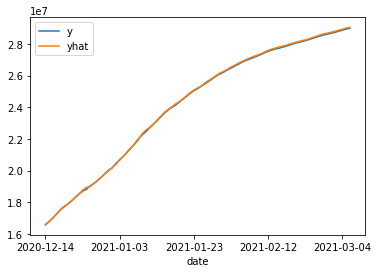

In [20]:
_ = plot.plot(kind='line')